In [1]:
import matplotlib.pyplot as plotter
import numpy

## Against uniform dist

In [2]:
b0 = numpy.array([0.0, 1.0])

b = [i for i in numpy.arange(0.0, 1.01, 0.01)]
l1_distances = [numpy.linalg.norm((b0 - numpy.array([i, 1.0 - i])), ord=1) for i in b]
l2_distances = [numpy.linalg.norm((b0 - numpy.array([i, 1.0 - i])), ord=2) ** 2 for i in b]
l1_weights = [2 / (1.0 + d) for d in l1_distances]
l2_weights = [2 / (1.0 + d) for d in l2_distances]

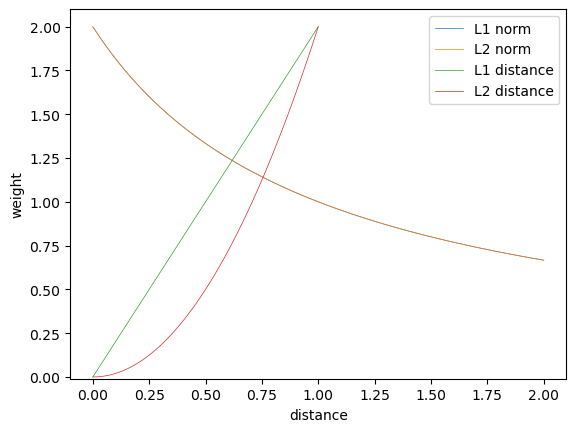

In [3]:
# plotter.plot(distances, linewidth=0.5, label="L1 distances")
plotter.plot(l1_distances, l1_weights, linewidth=0.5, label="L1 norm")
plotter.plot(l2_distances, l2_weights, linewidth=0.5, label="L2 norm")
plotter.plot(b, l1_distances, linewidth=0.5, label="L1 distance")
plotter.plot(b, l2_distances, linewidth=0.5, label="L2 distance")
plotter.ylim(-0.01, 2.1)
plotter.xlabel("distance")
plotter.ylabel("weight")
plotter.legend()
plotter.show()

## Against certain beliefs

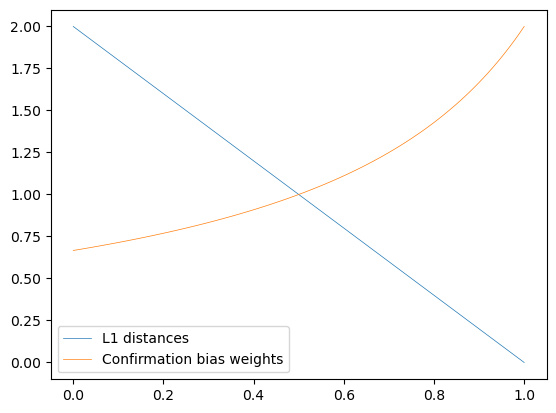

In [4]:
b0 = numpy.array([1.0, 0.0])

b = [i for i in numpy.arange(0.0, 1.01, 0.01)]
distances = [numpy.linalg.norm((b0 - numpy.array([i, 1.0 - i])), ord=1) for i in b]
weights = [2.0 / (1.0 + d) for d in distances]

plotter.plot(b, distances, linewidth=0.5, label="L1 distances")
plotter.plot(b, weights, linewidth=0.5, label="Confirmation bias weights")
# plotter.ylim(-0.01, 1.5)
plotter.legend()
plotter.show()

## Full surface

In [5]:
b = [i for i in numpy.arange(0.0, 1.01, 0.01)]
distances = numpy.array([[numpy.linalg.norm((numpy.array([j, 1.0 - j]) - numpy.array([i, 1.0 - i])), ord=1) for i in b] for j in b])
print(distances)

[[0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.02 0.   0.02 ... 1.94 1.96 1.98]
 [0.04 0.02 0.   ... 1.92 1.94 1.96]
 ...
 [1.96 1.94 1.92 ... 0.   0.02 0.04]
 [1.98 1.96 1.94 ... 0.02 0.   0.02]
 [2.   1.98 1.96 ... 0.04 0.02 0.  ]]


In [6]:
gammas = 1.0 / (1.0 + distances)
print(gammas)

[[1.         0.98039216 0.96153846 ... 0.33783784 0.33557047 0.33333333]
 [0.98039216 1.         0.98039216 ... 0.34013605 0.33783784 0.33557047]
 [0.96153846 0.98039216 1.         ... 0.34246575 0.34013605 0.33783784]
 ...
 [0.33783784 0.34013605 0.34246575 ... 1.         0.98039216 0.96153846]
 [0.33557047 0.33783784 0.34013605 ... 0.98039216 1.         0.98039216]
 [0.33333333 0.33557047 0.33783784 ... 0.96153846 0.98039216 1.        ]]


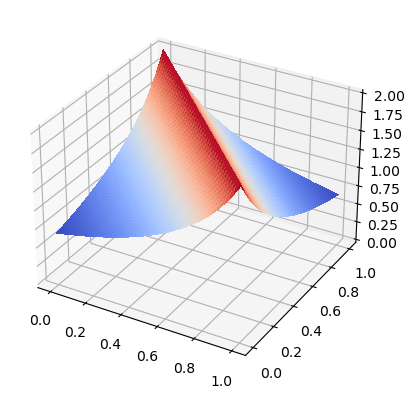

In [7]:
X = numpy.arange(0.0, 1.001, 0.001)
Y = numpy.arange(0.0, 1.001, 0.001)
X, Y = numpy.meshgrid(X, Y)
D = numpy.array([X, 1.0 - X]) - numpy.array([1.0 - Y, Y])
D = 2.0 / (1.0 + numpy.linalg.norm(D, ord=1, axis=0))

f, axis = plotter.subplots(subplot_kw=dict(projection='3d'))
surf = axis.plot_surface(X, Y, D, linewidth=0, shade=False, cmap=plotter.cm.coolwarm, antialiased = False)
axis.set_zlim(0.0, 2.0)
plotter.show()